In [1]:
import sys
import serial
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]
import skrf as rf
sys.path.append("gpib_instrument_control")
import gpib_instrument_control.hp_8700_series_vna

v=gpib_instrument_control.hp_8700_series_vna.Hp8753A();
cks=serial.Serial('/dev/ttyUSB0', 115200)

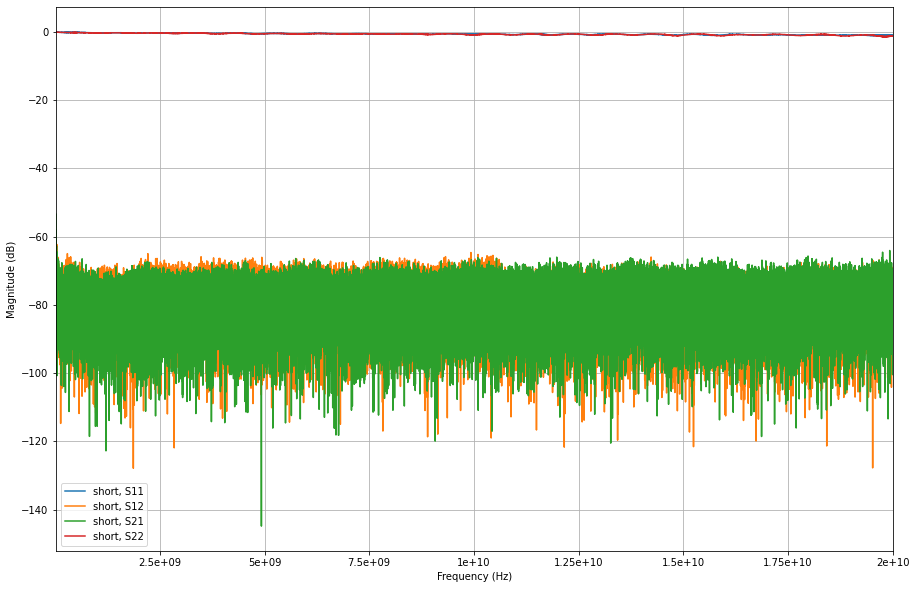

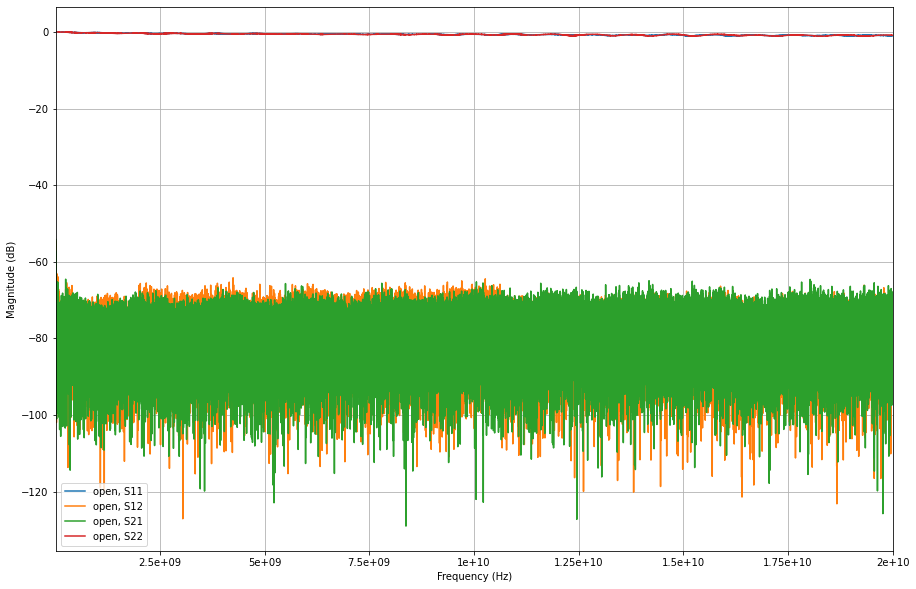

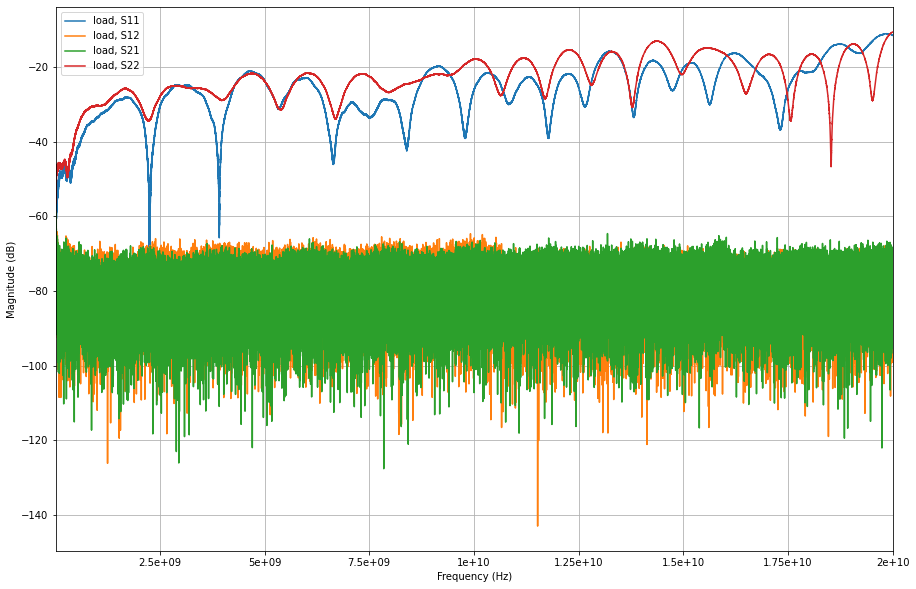

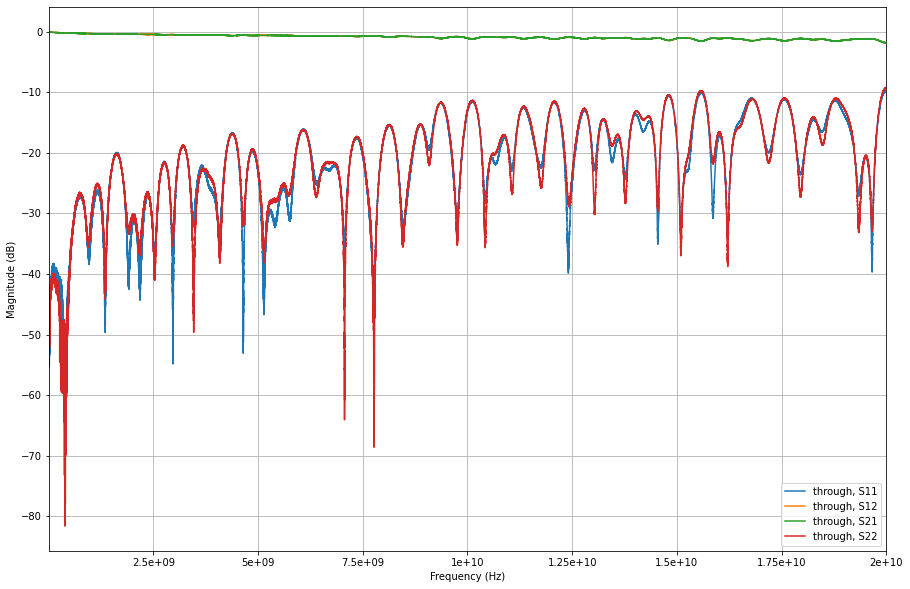

In [56]:
s_short=rf.Network('cal_stds/short.s2p')
s_open=rf.Network('cal_stds/open.s2p')
s_load=rf.Network('cal_stds/load.s2p')
s_through=rf.Network('cal_stds/through.s2p')

s_short.plot_s_db()
plt.grid(True)
plt.figure()

s_open.plot_s_db()
plt.grid(True)
plt.figure()

s_load.plot_s_db()
plt.grid(True)
plt.figure()

s_through.plot_s_db()
plt.grid(True)

ideals=[s_short, s_open, s_load, s_through]

In [3]:
cks.write(b'S')
m_short=v.getHighResolutionNetwork(130e6, 20e9, 1e6)
m_short.write_touchstone('cal_current/short.s2p')

cks.write(b'O')
m_open=v.getHighResolutionNetwork(130e6, 20e9, 1e6)
m_open.write_touchstone('cal_current/open.s2p')

cks.write(b'L')
m_load=v.getHighResolutionNetwork(130e6, 20e9, 1e6)
m_load.write_touchstone('cal_current/load.s2p')

cks.write(b'T')
m_through=v.getHighResolutionNetwork(130e6, 20e9, 1e6)
m_through.write_touchstone('cal_current/through.s2p')


measured=[m_short, m_open, m_load, m_through]

Success
Success
Success
Success


/home/bjohan/.local/lib/python3.8/site-packages/skrf/calibration/calibration.py:1454: UserWarning: n_thrus is None, guessing which stds are transmissive
  warn('n_thrus is None, guessing which stds are transmissive')


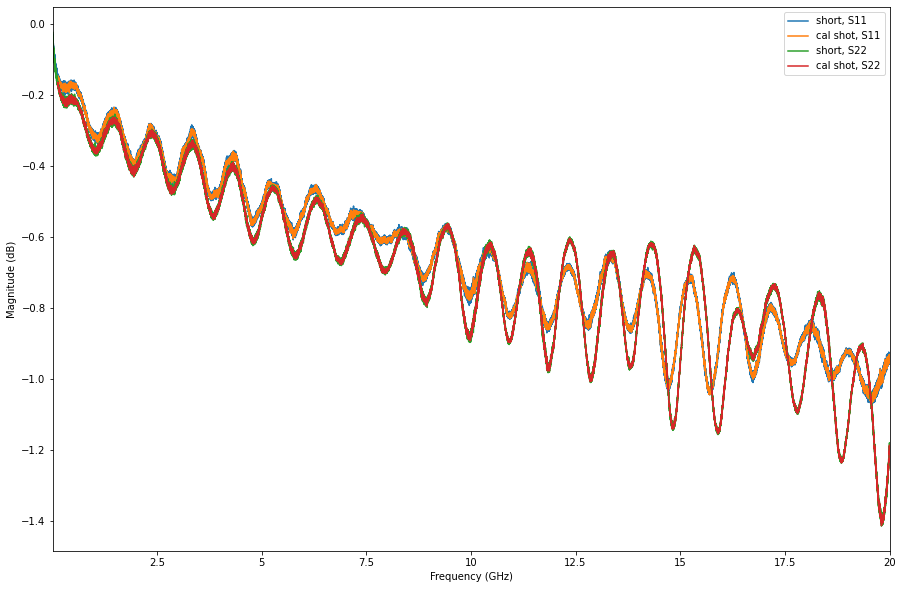

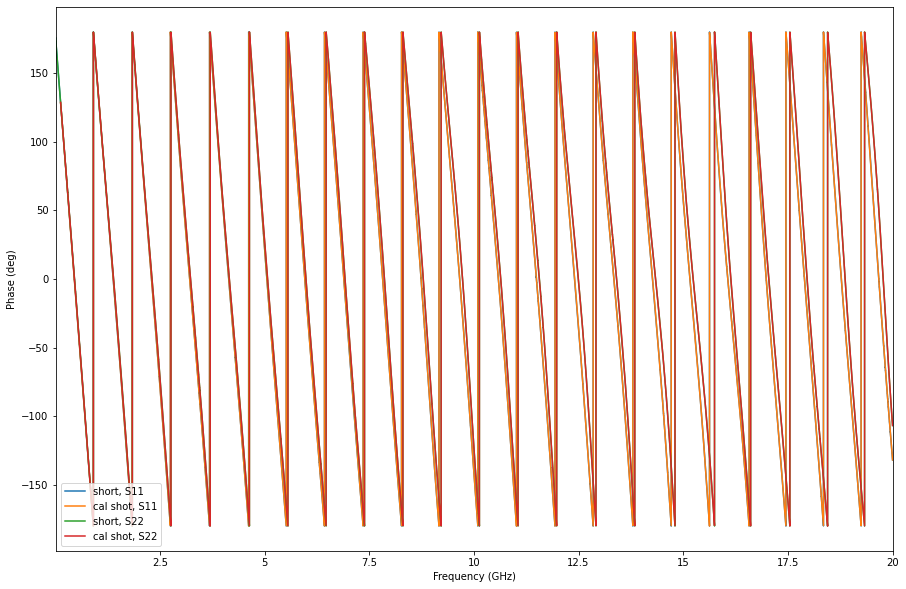

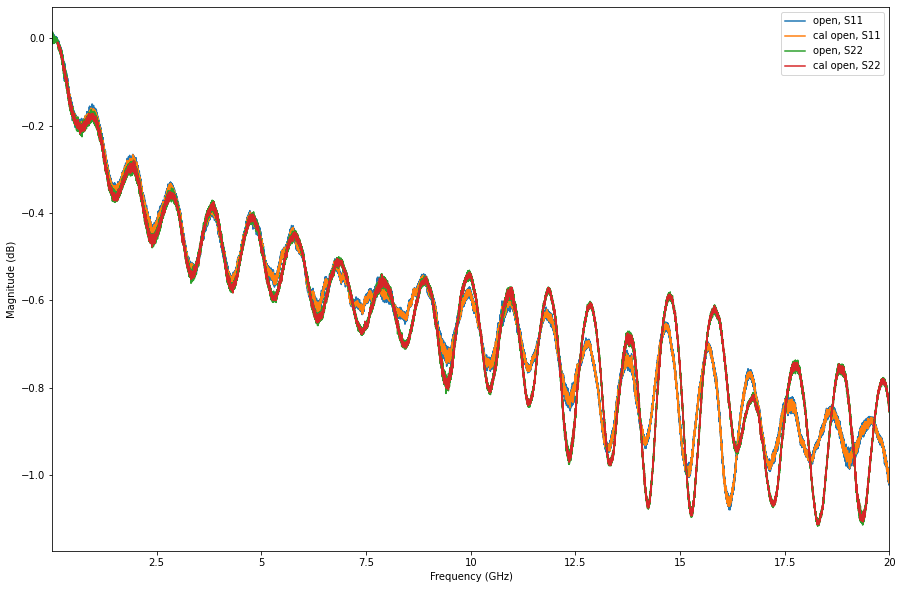

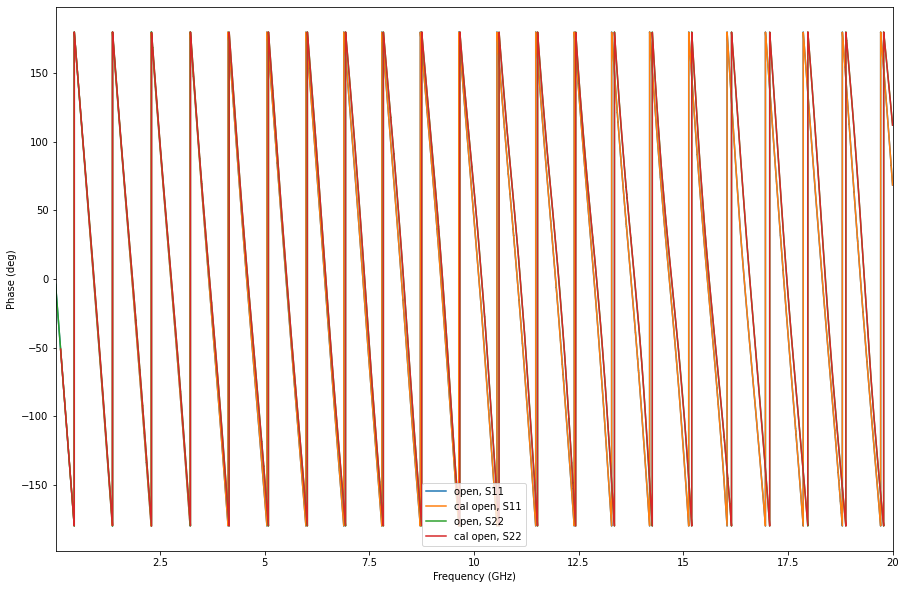

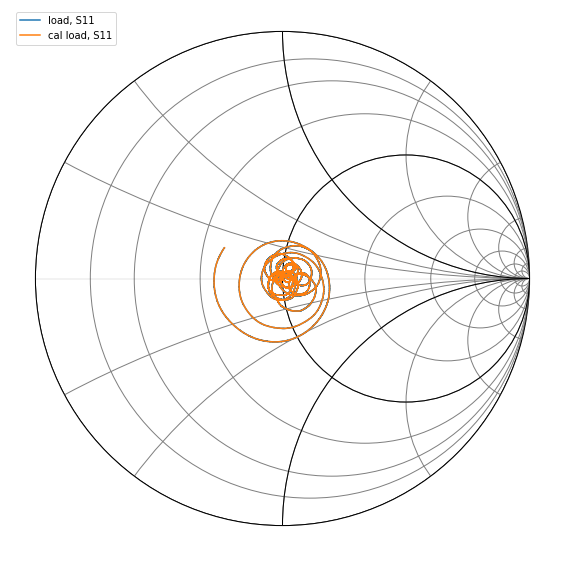

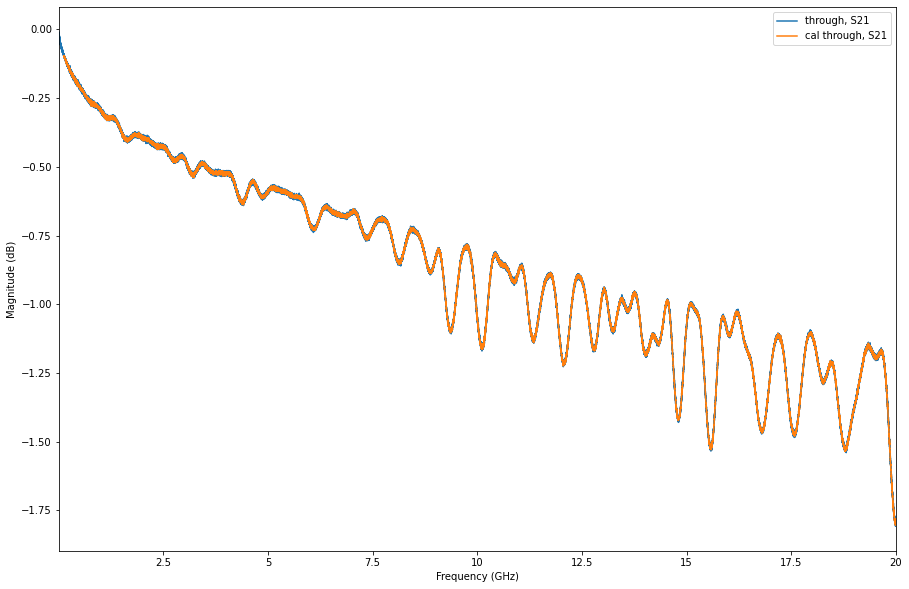

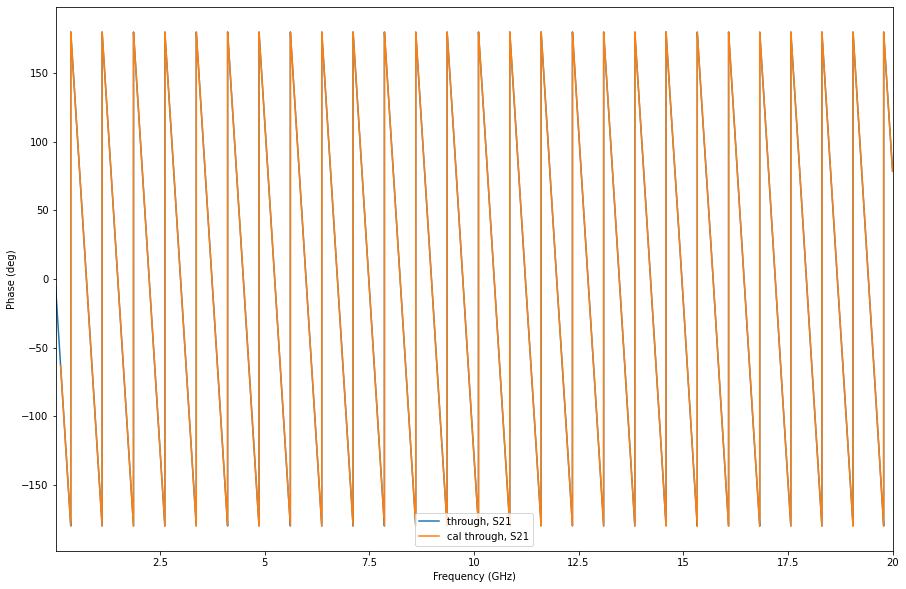

In [98]:
from skrf.calibration import TwelveTerm
import numpy as np

m_short=rf.Network('cal_current/short.s2p')
m_open=rf.Network('cal_current/open.s2p')
m_load=rf.Network('cal_current/load.s2p')
m_through=rf.Network('cal_current/through.s2p')

measured=[m_short, m_open, m_load, m_through]
cal = TwelveTerm(ideals = ideals, measured = measured)
cal.run()
cal_short = cal.apply_cal(m_short)
cal_short.name='cal shot'

cal_open = cal.apply_cal(m_open)
cal_open.name='cal open'

cal_load = cal.apply_cal(m_load)
cal_load.name='cal load'

cal_through = cal.apply_cal(m_through)
cal_through.name='cal through'


s_short.plot_s_db(m=0,n=0)
cal_short.plot_s_db(m=0,n=0)
s_short.plot_s_db(m=1,n=1)
cal_short.plot_s_db(m=1,n=1)

plt.figure()
s_short.plot_s_deg(m=0,n=0)
cal_short.plot_s_deg(m=0,n=0)
s_short.plot_s_deg(m=1,n=1)
cal_short.plot_s_deg(m=1,n=1)



plt.figure()
s_open.plot_s_db(m=0,n=0)
cal_open.plot_s_db(m=0,n=0)
s_open.plot_s_db(m=1,n=1)
cal_open.plot_s_db(m=1,n=1)

plt.figure()
s_open.plot_s_deg(m=0,n=0)
cal_open.plot_s_deg(m=0,n=0)
s_open.plot_s_deg(m=1,n=1)
cal_open.plot_s_deg(m=1,n=1)



plt.figure()
s_load.plot_s_smith(m=0,n=0)
cal_load.plot_s_smith(m=0,n=0)

plt.figure()
s_through.plot_s_db(m=1,n=0)
cal_through.plot_s_db(m=1,n=0)

plt.figure()
s_through.plot_s_deg(m=1,n=0)
cal_through.plot_s_deg(m=1,n=0)


#print(np.min(s_through.f)/1e6, np.max(s_through.f)/1e6)

#fax=rf.Frequency(0.13, 20, 501, 'ghz')
#print(np.min(fax)/1e6, np.max(fax)/1e6)

#s_through_i=s_through.interpolate(fax)
#cal_through_i=cal_through.interpolate(fax)
#cal_open_i=cal_open.interpolate(fax)


#t_through=s_through_i*cal_through_i
#t_through.name='through multd'
#plt.figure()
#s_through.plot_s_db(m=1,n=0)
#t_through.plot_s_db(m=1,n=0)

#plt.figure()
#s_through.plot_s_deg(m=1,n=0)
#t_through.plot_s_deg(m=1,n=0)


#t_open=s_through_i*cal_open_i
#t_open.name='open multd'

#plt.figure()
#t_open.plot_s_db(m=0,n=0)
#t_open.plot_s_db(m=0,n=0)

#plt.figure()
#t_open.plot_s_deg(m=0,n=0)
#t_open.plot_s_deg(m=0,n=0)


In [92]:
cks.write(b'S')
rs=v.getScikitRfNetworkSparameters()


cks.write(b'O')
ro=v.getScikitRfNetworkSparameters()


cks.write(b'L')
rl=v.getScikitRfNetworkSparameters()

cks.write(b'T')
rt=v.getScikitRfNetworkSparameters()



100%|██████████| 4/4 [00:15<00:00,  3.83s/it]


In [114]:
bullitt=v.getHighResolutionNetwork(130e6, 20e9, 1e6)

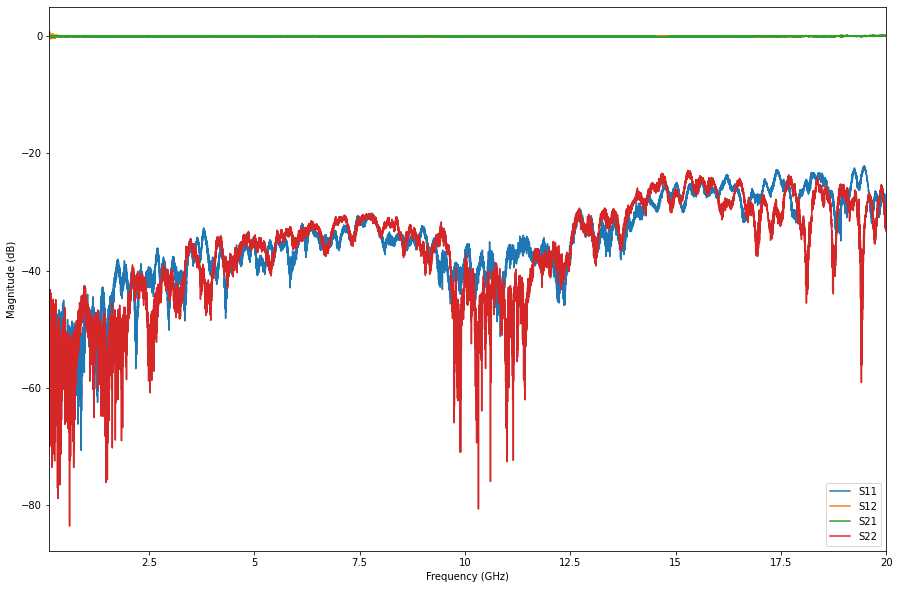

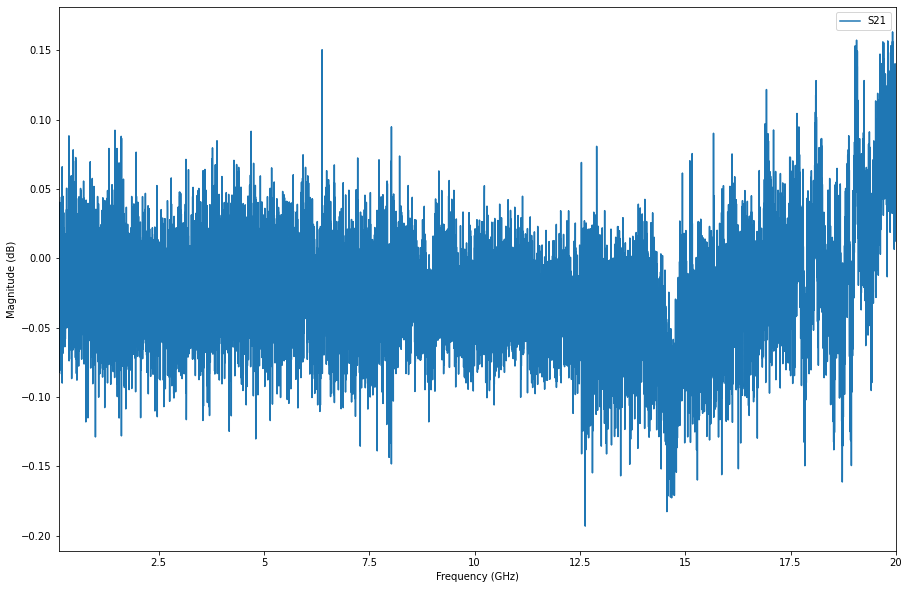

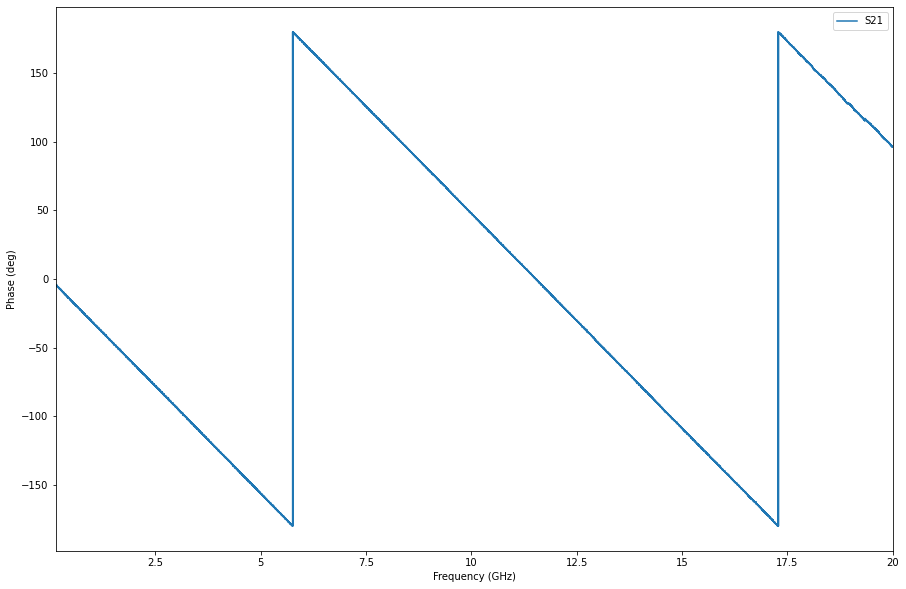

In [120]:
bc=cal.apply_cal(bullitt)
bc.plot_s_db()
plt.figure()
bc.plot_s_db(m=1, n=0)
plt.figure()
bc.plot_s_deg(m=1, n=0)

In [118]:
att=v.getHighResolutionNetwork(130e6, 20e9, 1e6)

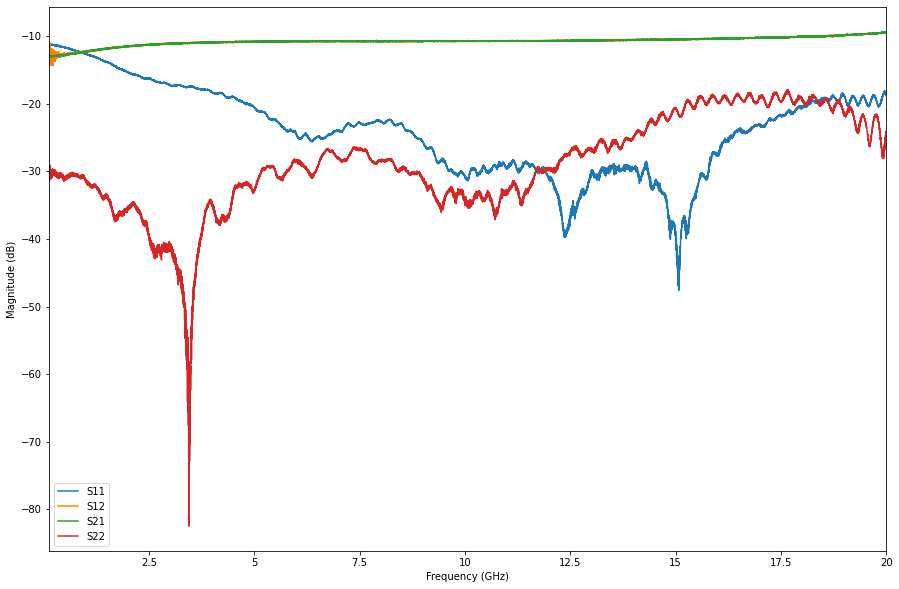

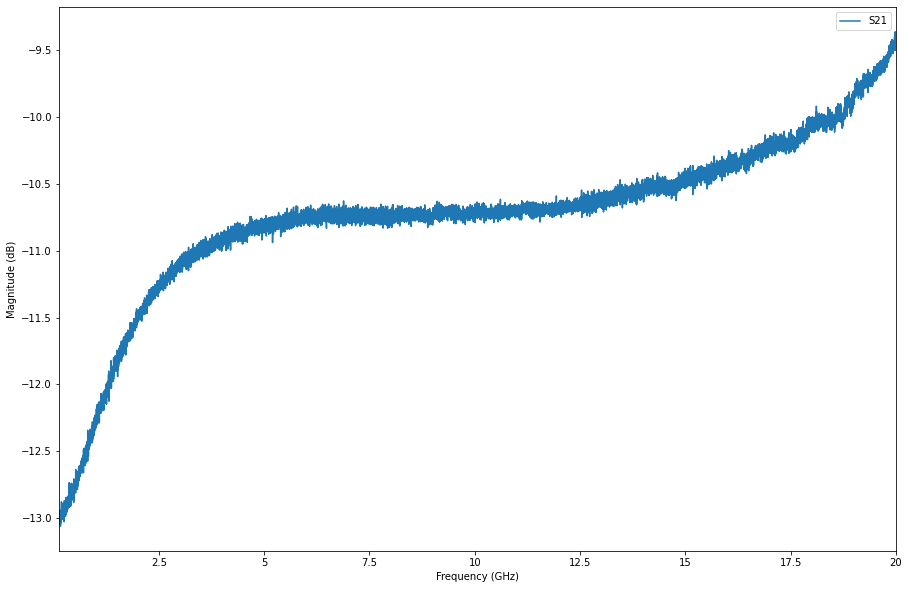

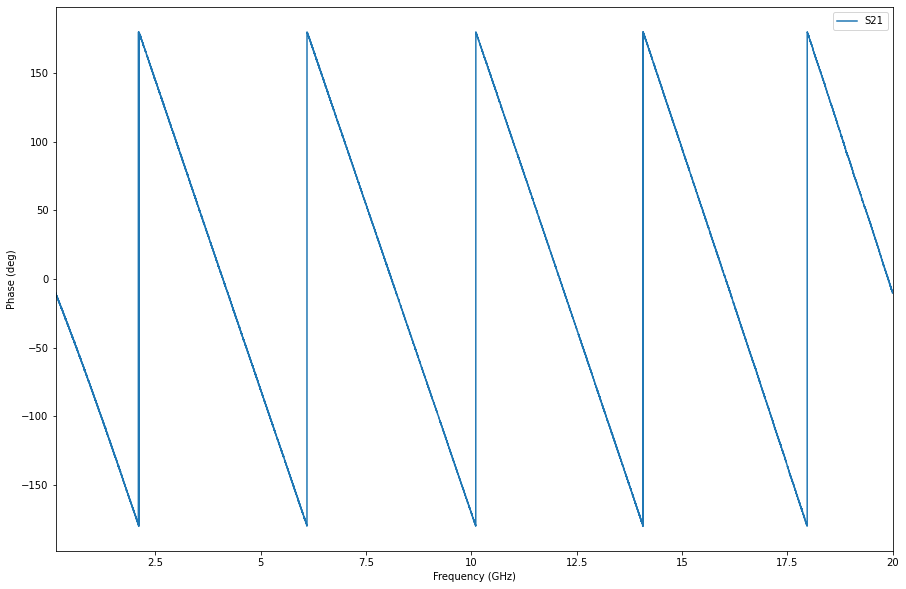

In [121]:
ac=cal.apply_cal(att)
ac.plot_s_db()
plt.figure()
ac.plot_s_db(m=1, n=0)
plt.figure()
ac.plot_s_deg(m=1, n=0)

In [122]:
att3db=v.getHighResolutionNetwork(130e6, 20e9, 1e6)

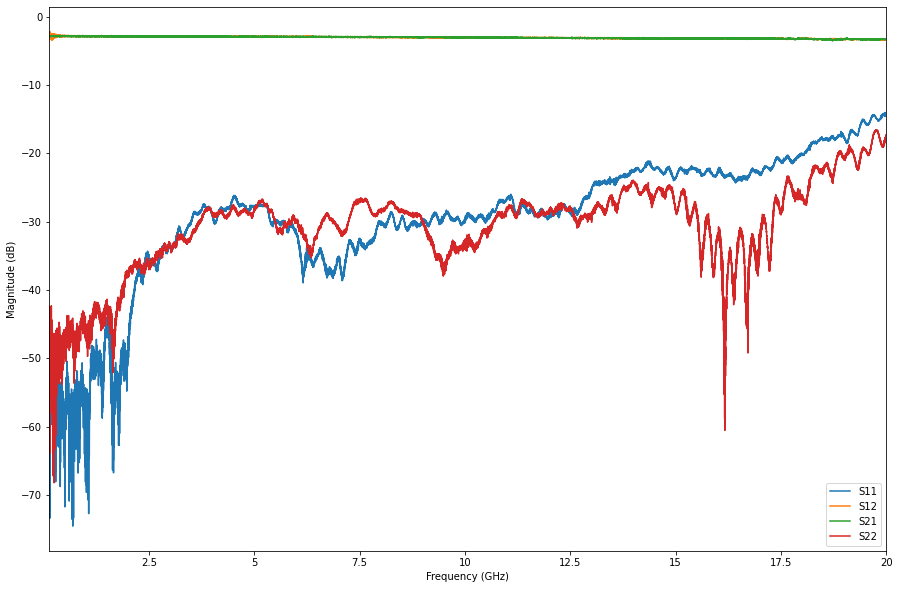

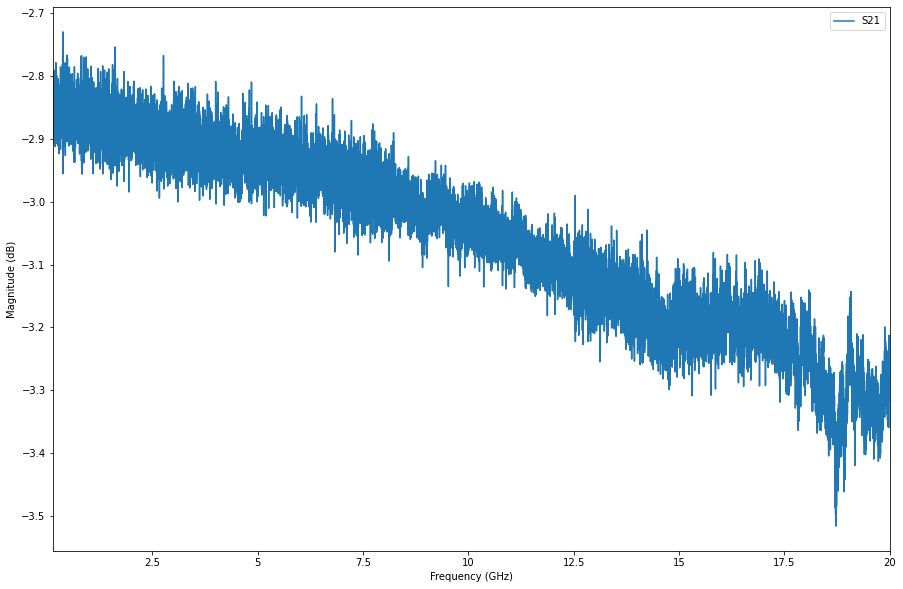

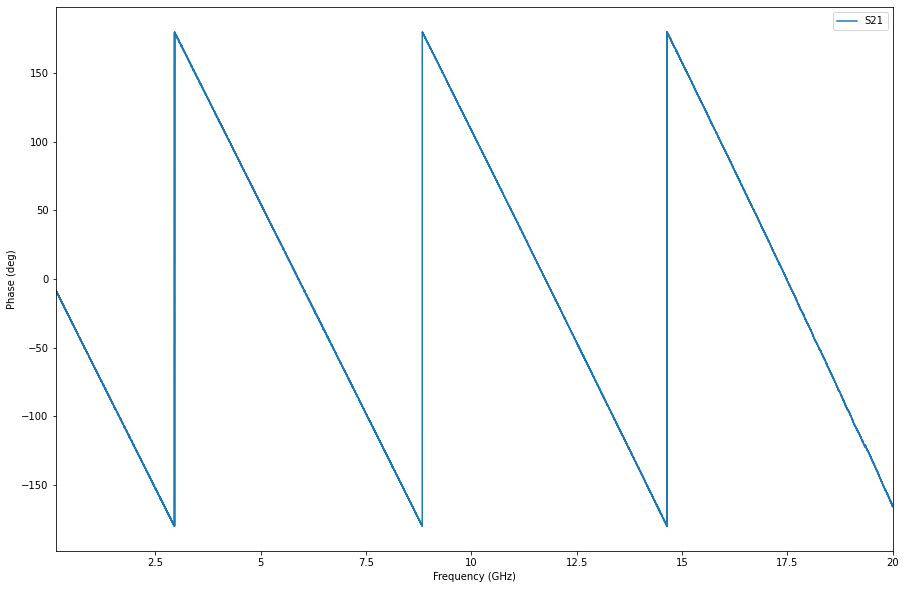

In [123]:
ac=cal.apply_cal(att3db)
ac.plot_s_db()
plt.figure()
ac.plot_s_db(m=1, n=0)
plt.figure()
ac.plot_s_deg(m=1, n=0)

In [124]:
att21db=v.getHighResolutionNetwork(130e6, 20e9, 1e6)

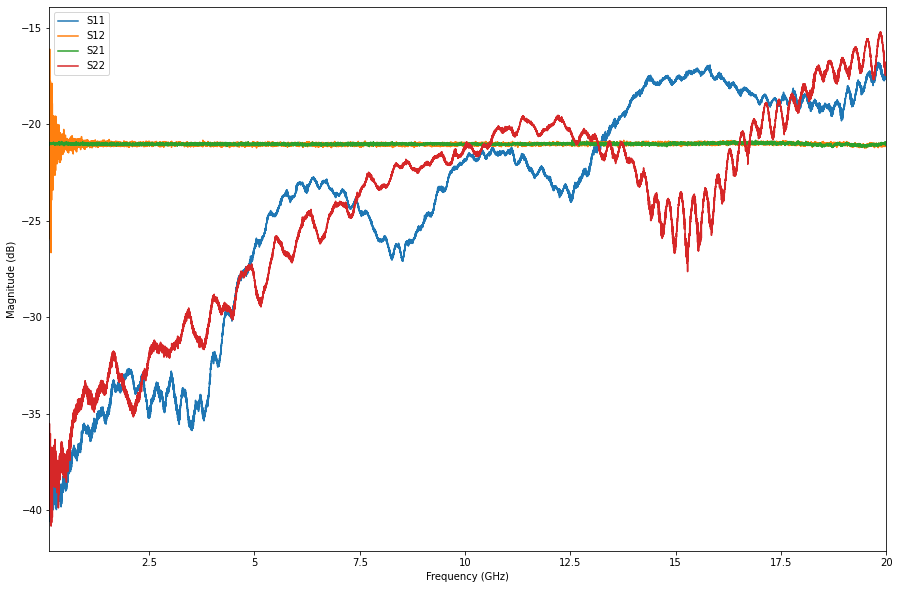

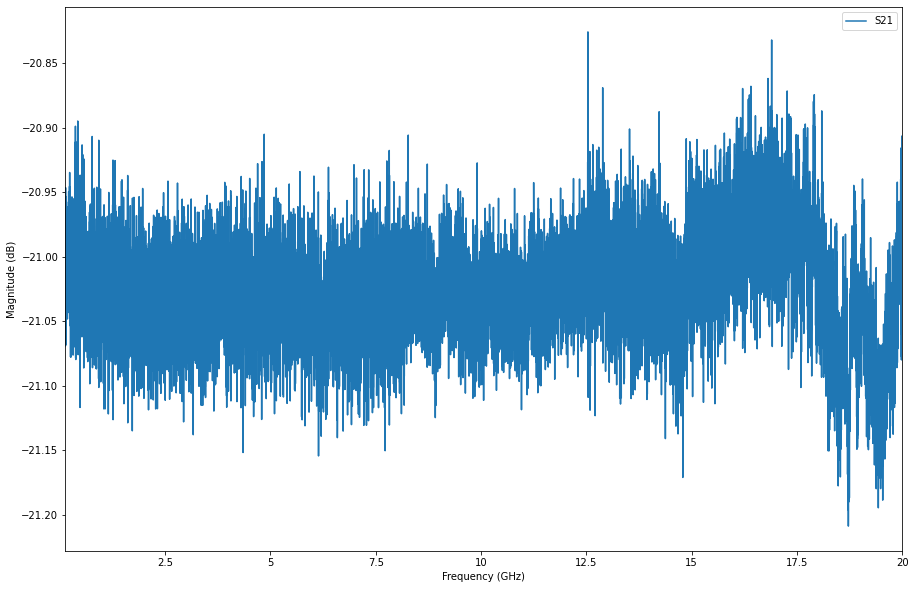

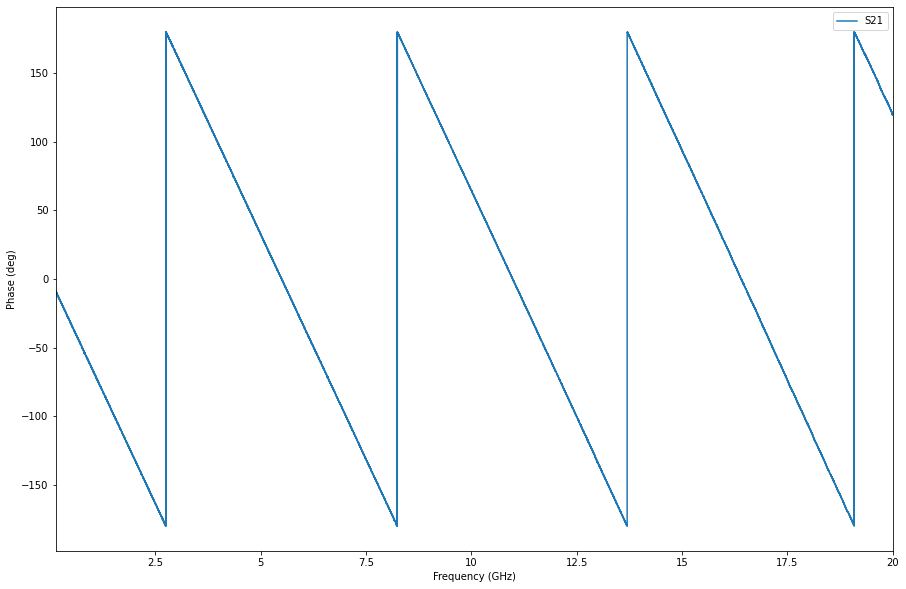

In [125]:
ac=cal.apply_cal(att21db)
ac.plot_s_db()
plt.figure()
ac.plot_s_db(m=1, n=0)
plt.figure()
ac.plot_s_deg(m=1, n=0)

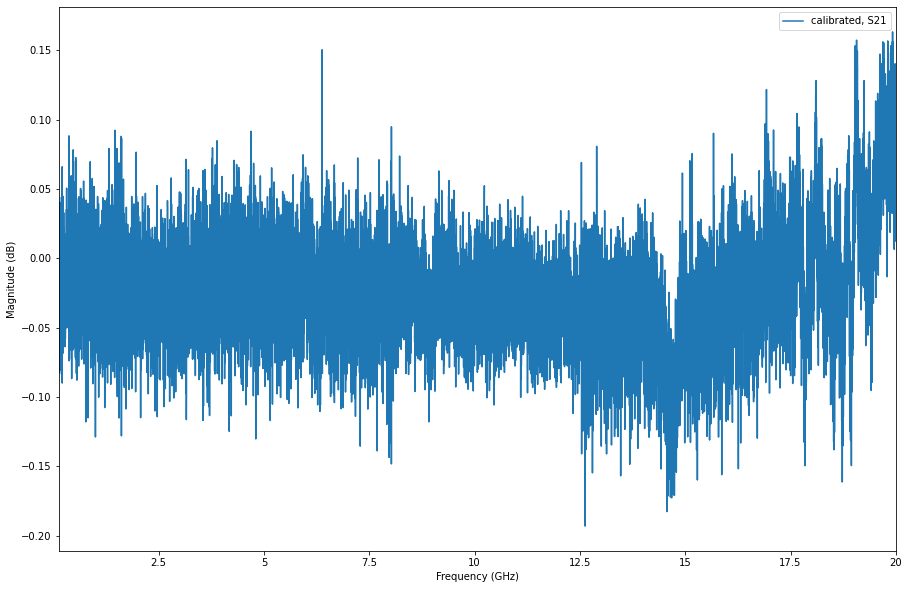

In [115]:


def testCal(ref, meas, cal):
    mr=meas.interpolate(m_short.frequency)
    cmr=cal.apply_cal(mr)
    cmr.name='calibrated'
    cmr.plot_s_db(m=1, n=0)
    if ref is not None:
        ref.plot_s_db()

    
testCal(None, bullitt, cal)    
    
#print(m_short.frequency)

#rsr=rs.interpolate(m_short.frequency)

#rs.plot_s_db()
#s_short.plot_s_db()
#cal_rs = cal.apply_cal(rsr)

#rs.plot_s_db(m=0,n=0)
#cal_rs.plot_s_db(m=0,n=0)
#s_short.plot_s_db(m=1,n=1)

In [127]:
cks.write(b'S')
r_short=v.getHighResolutionNetwork(130e6, 20e9, 1e6)


cks.write(b'O')
r_open=v.getHighResolutionNetwork(130e6, 20e9, 1e6)


cks.write(b'L')
r_load=v.getHighResolutionNetwork(130e6, 20e9, 1e6)


cks.write(b'T')
r_through=v.getHighResolutionNetwork(130e6, 20e9, 1e6)


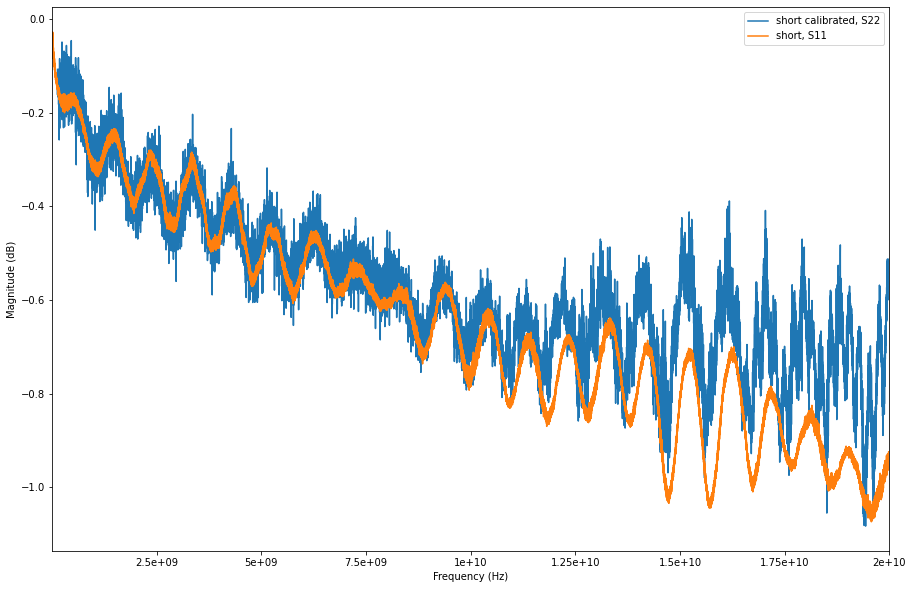

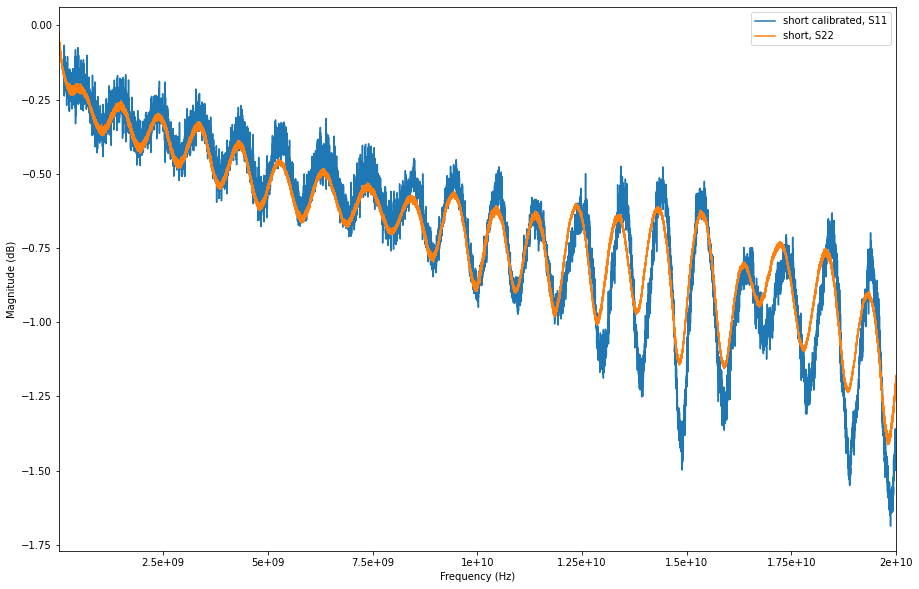

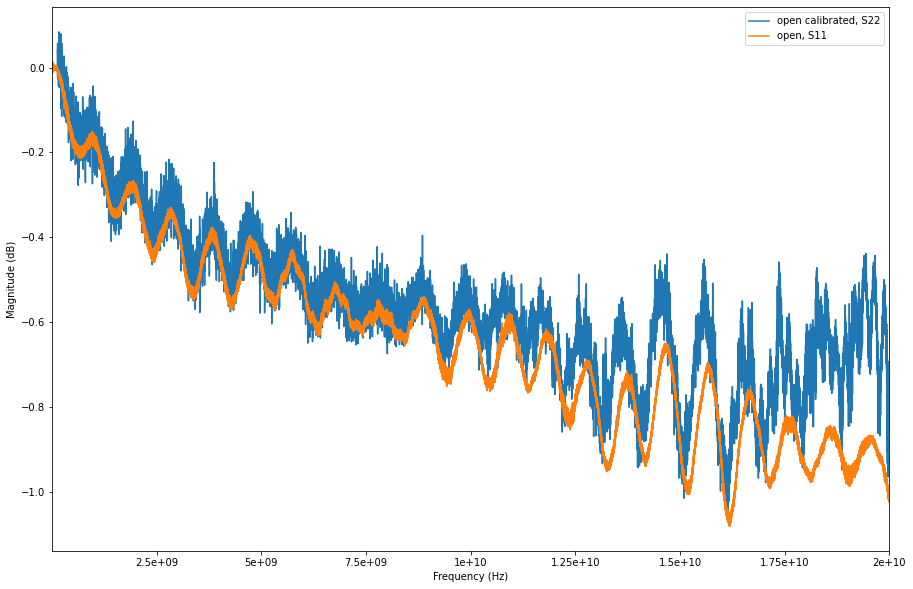

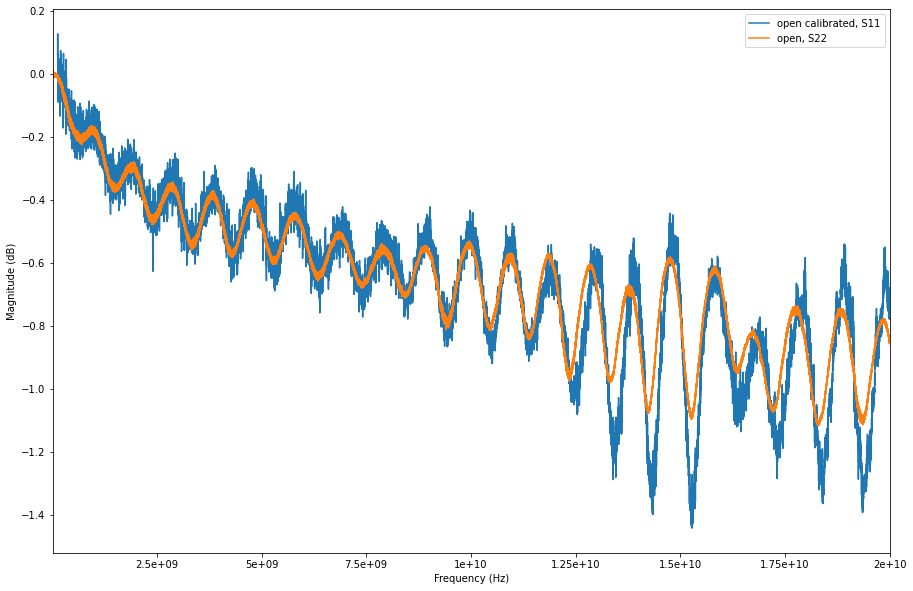

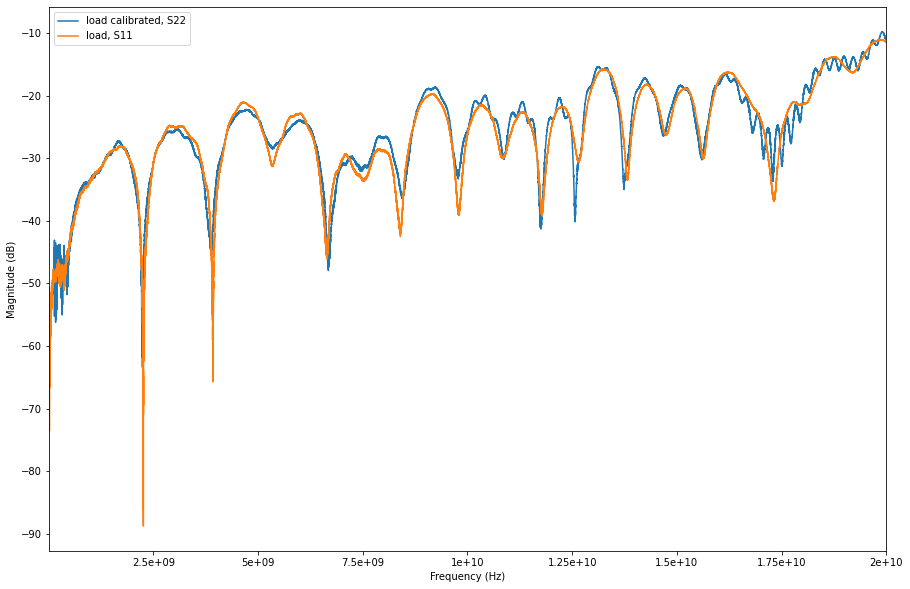

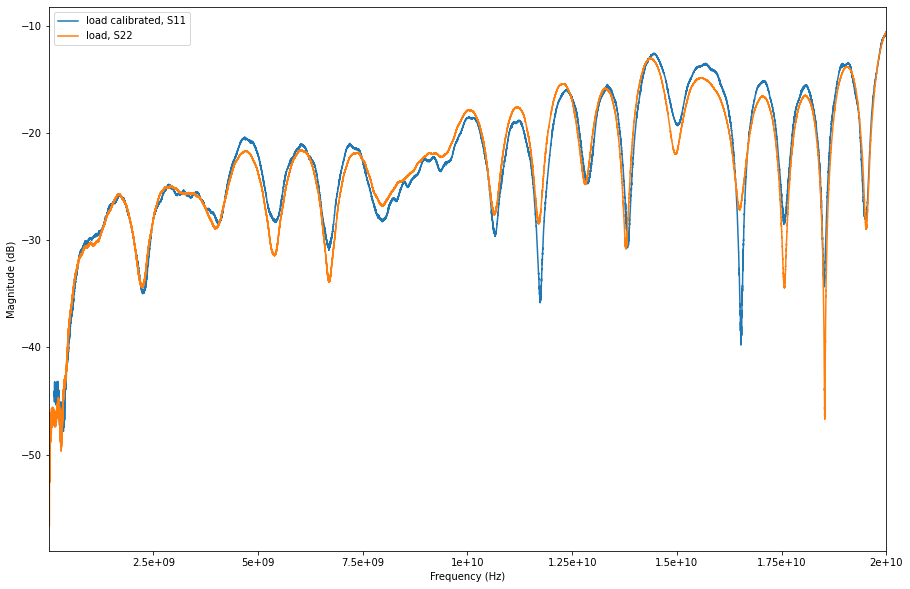

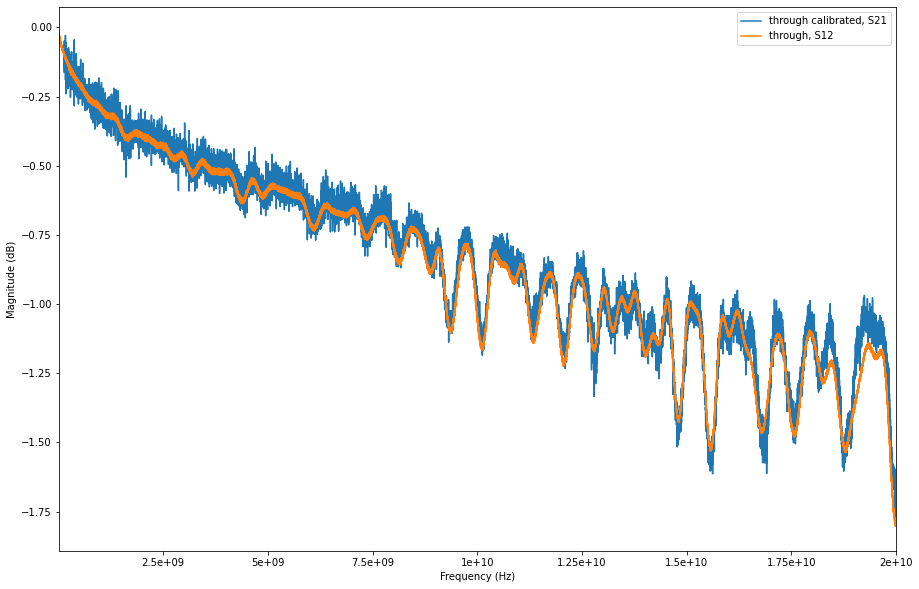

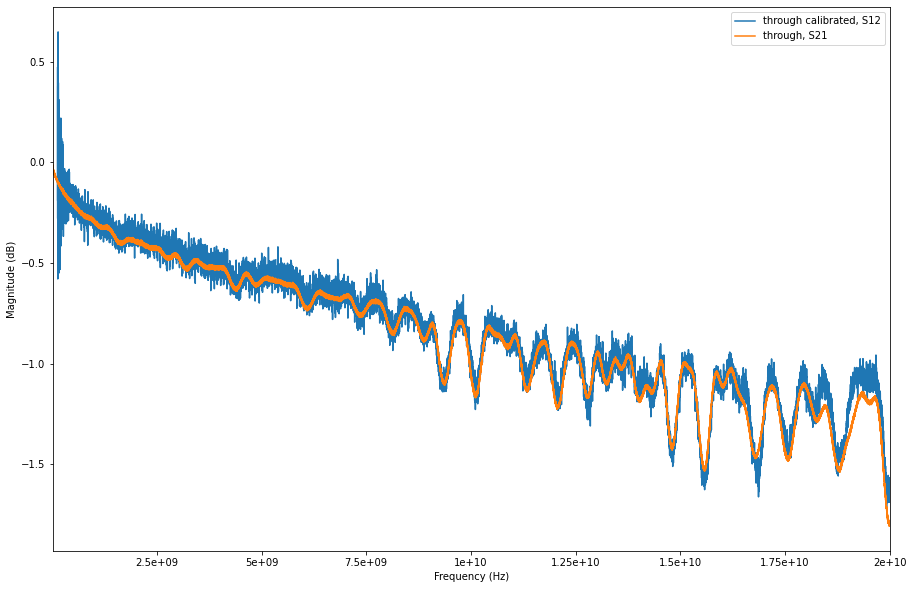

In [143]:
def testCal(ref, meas, cal, mm, nn):
    cmr=cal.apply_cal(meas)
    cmr.name=meas.name+' calibrated'
    cmr.plot_s_db(m=mm, n=nn)
    ref.plot_s_db(m=1-mm, n=1-nn)

    
r_short.name='short'
testCal(s_short, r_short, cal, 1, 1)
plt.figure()
testCal(s_short, r_short, cal, 0, 0)

plt.figure()
r_open.name='open'
testCal(s_open, r_open, cal, 1, 1)
plt.figure()
testCal(s_open, r_open, mcal, 0, 0)

plt.figure()
r_load.name='load'
testCal(s_load, r_load, cal, 1, 1)
plt.figure()
testCal(s_load, r_load, cal, 0, 0)

plt.figure()
r_through.name='through'
testCal(s_through, r_through, cal, 1, 0)
plt.figure()
testCal(s_through, r_through, cal, 0, 1)
